# Quantum Mechanics of One-Dimensional Two-Particle Models. Charged Particles Interacting in Different Potentials

Solutions of Schrödinger's equation for the system of two particles bound in a one-dimensional potential and repelling each other with a Coulomb force are obtained by the method of finite differences. In this notebook I will add the different components one by one which should show how the components effect the wave function.

I will display several potentials including infinite square well, harmonic potential and a double well and discuss them.

## Draft of the algorithm

The algorithm that I am using is based on the paper "Quantum Mechanics of One-Dimensional Two-Particle Models. Electrons Interactingin an Infinite Square Well". However, there are some details that are differnt and we will discuss them in detail. 

### Description of the System

The system we are looking at exists in a one dimensional space. Which means the particles can run along a line with length L. The line will be devided into a number of segments n. The resulting space between each point, in other words, the length of one segment a as well as the number of segments will be input variables.



## Implementing the algorithm

In the first step we import the libraries that we are going to use.

In [1802]:
import sys
import math
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plot

Next we define the constants that we need for the calculations. In this we are going to usee Hartree Units. The max_int variable is used for sorting an array and therefore has no physical purpose.

In [1803]:
max_int = sys.maxsize
hbar = 1

In the next segment we can set the input parameters.
* step_size: space between each data point
* number_of_data_points: the number of data points
* charge: charge of one particle

In [1804]:
step_size = 0.04
number_of_data_points = 100 - 1
charge = -1
mass = 1

Now we want to calculate how many data points we have.

In [1805]:
# calculate triangle points / inner points
triangle_points = 0

# add elements of row / row after row
for i in range(number_of_data_points):
    triangle_points += i
    
print('Triangle Points:' + str(triangle_points))

Triangle Points:4851


### Kinetic Energy Matrix

In [1806]:
# init kinetic matrix
kinetic = np.zeros((triangle_points, triangle_points))

# set diagonal elements
for i in range(triangle_points):
    kinetic[i,i] = 4

# set off diagonal elements
index = 0
for j in range(2 , number_of_data_points, 1):
    for i in range(number_of_data_points - j):
        kinetic[index,index+1] = -1
        index += 1
        kinetic[index,index-1] = -1
        kinetic[index,index+number_of_data_points - j] = -1
        kinetic[index+number_of_data_points - j,index] = -1
    index +=1
    
# add multiplier
kinetic_multiplier = np.square(hbar) / (2 * mass * np.square(step_size))
kinetic = kinetic * kinetic_multiplier

### Coulomb Potential Matrix

In [1807]:
# init coulomb matrix
coulomb = np.zeros((triangle_points, triangle_points))

# calculate coulomb potential matrix
counter = 0
for j in range(number_of_data_points - 1):
    for i in range(number_of_data_points - j -1):
        coulomb[counter, counter] = np.reciprocal((i + 1) * step_size)
        counter += 1

### Define Potential

In this segment we can define the potential to use for the calculation.

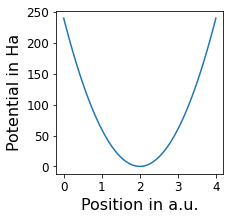

In [1808]:
# calculate length of the space
length = step_size * (number_of_data_points + 1)
# get discretized positions
x_positions = np.linspace(0, length, number_of_data_points)
# init array as zeroes
potential_in_space = np.zeros(number_of_data_points)


# Harmonic Potential
if False:
    a = 60
    for i in range(len(x_positions)):
        potential_in_space[i] = a * np.square(x_positions[i] - length / 2)

# Double Well Potential
if True:
    a = 80
    c = 0.4
    for i in range(len(x_positions)):
        potential_in_space[i] = 50 + a * (c * np.power(x_positions[i] - length / 2, 4) - np.power(x_positions[i] - length / 2, 2))

        
# change plot size
plot.figure(figsize=(3, 3))

plot.plot(x_positions, potential_in_space)
# uncomment next line to display potential well
# plot.vlines(x=[0, length], ymin=0, ymax=250)

# set font size selection
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

# set font sizes
plot.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plot.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plot.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plot.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plot.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plot.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plot.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# set axis labels
plot.xticks(range(0,5,1))
plot.xlabel('Position in a.u.')
plot.ylabel('Potential in Ha')

plot.show()

## Potential Matrix

In [1809]:
# init potential matrix
potential = np.zeros((triangle_points, triangle_points))

# translate potential matrix to triangle form
counter = 0
for k in range(number_of_data_points - 1):
    for j in range(k + 1, number_of_data_points, 1):
        potential[counter, counter] = potential_in_space[j] + potential_in_space[k]
        counter += 1

### Calculate Hamiltonian and solve Eigenvalue Problem

In [1810]:
# sum up energy components for hamiltonian
hamiltonian = kinetic + coulomb + potential

# solve eigenvalue problem    
eigenvalues, eigenvectors = la.eig(hamiltonian)
# cast eigenvalues to real numbers
eigenvalues = np.real(eigenvalues)

### Extract and format information

In [1811]:
display_values = []
# display_vectors will be used for the plots therefore only one triangle
display_vectors = []
# eigen_vectors will be used for pair correlation function and normalization
eigen_vectors = []

for i in range(21):
    # get index of smalles eigenvalue
    index = np.argmin(eigenvalues)
    
    # append value and vector to display arrays and eigenvector array
    # and set value
    display_values.append(eigenvalues[index])
    display_vectors.append(np.zeros(np.square(number_of_data_points + 1)))
    eigen_vectors.append(np.zeros(np.square(number_of_data_points + 1)))
    
    # arrange vectors
    display_vectors[i] = display_vectors[i].reshape((number_of_data_points + 1, number_of_data_points + 1))
    eigen_vectors[i] = eigen_vectors[i].reshape((number_of_data_points + 1, number_of_data_points + 1))
    
    # fill vectors
    counter = 0
    for k in range(number_of_data_points):
        for j in range(k + 1, number_of_data_points, 1):
            display_vectors[i][k, j] = eigenvectors[counter,index]
            eigen_vectors[i][k, j] = eigenvectors[counter,index]
            eigen_vectors[i][j, k] = eigenvectors[counter,index]
            
            counter += 1
            
    # normalize vectors        
    sum = 0        
    for k in range(number_of_data_points):
        for j in range(number_of_data_points):
            sum += eigen_vectors[i][k, j] * eigen_vectors[i][k, j] * step_size
    
    for k in range(number_of_data_points):
        for j in range(k + 1, number_of_data_points, 1):
            display_vectors[i][k, j] = display_vectors[i][k, j] / sum
            eigen_vectors[i][k, j] = eigen_vectors[i][k, j] / sum
            eigen_vectors[i][j, k] = eigen_vectors[i][j, k] / sum
    
    eigenvalues[index] = max_int

### Print Energies

In [1812]:
print('Ground State: ' + str(display_values[0]))
print('First Excited State: ' + str(display_values[1]))
print('Second Excited State: ' + str(display_values[2]))
#print('Third Excited State: ' + str(display_values[3]))
#print('Fourth Excited State: ' + str(display_values[4]))
print('Fifth Excited State: ' + str(display_values[5]))
print('Tenth Excited State: ' + str(display_values[10]))
print('Fifteenth Excited State: ' + str(display_values[15]))
print('Twentieth Excited State: ' + str(display_values[20]))

Ground State: 24.912082080029634
First Excited State: 36.04261500369776
Second Excited State: 46.78012653269504
Fifth Excited State: 58.268667562270934
Tenth Excited State: 79.99522256529787
Fifteenth Excited State: 91.51781208171602
Twentith Excited State: 112.58769629103699


### Plot States

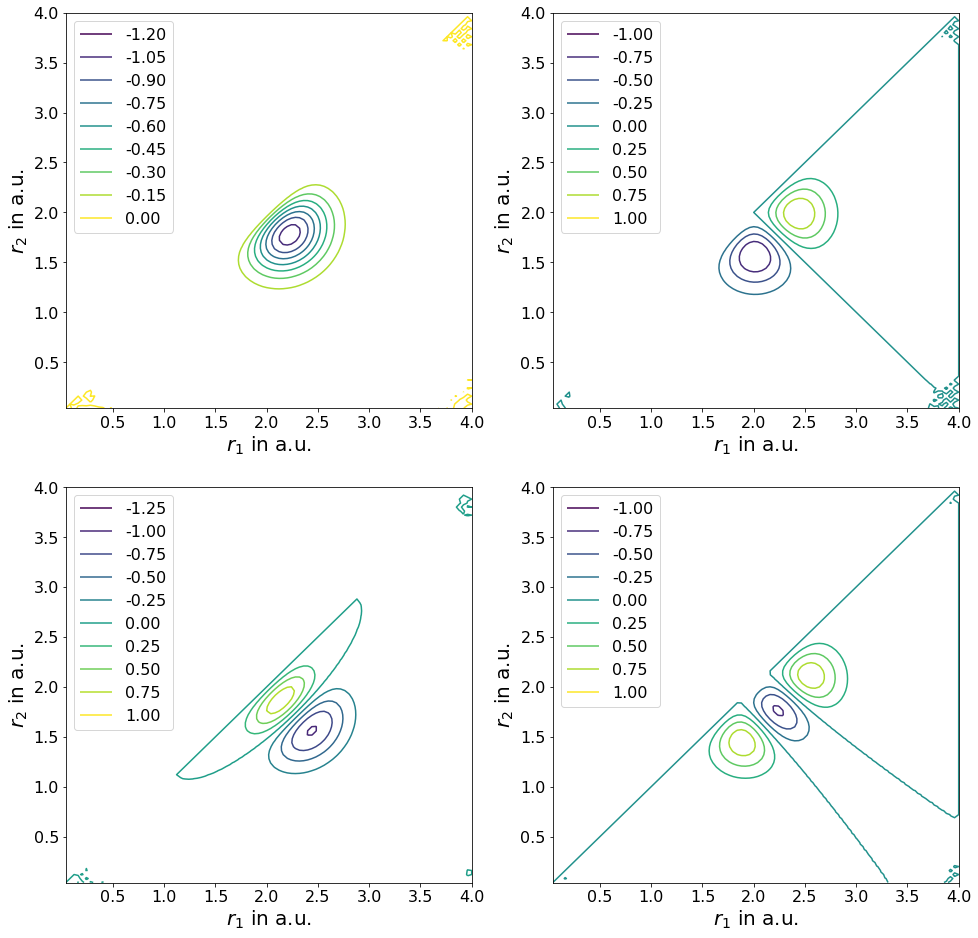

In [1813]:
# init plots
fig, _ax = plot.subplots(nrows=2, ncols=2)
ax = _ax.flatten()

# set size of plot
fig.set_size_inches(16, 16)

# arrange data
x = y = np.arange(0, step_size * (number_of_data_points + 1), step_size)
X, Y = np.meshgrid(x+0.04, y+0.04)

for i in range(4):
    # set axis labels
    ax[i].set_xlabel('$r_1$ in a.u.', fontsize=20)
    ax[i].set_ylabel('$r_2$ in a.u.', fontsize=20)
    ax[i].tick_params(axis='both', which='major', labelsize=16)
    
    # draw plot
    CS = ax[i].contour(X, Y, display_vectors[i])

    # set legend
    h = CS.collections
    l = [f'{a:.2f}' for a in CS.levels]
    ax[i].legend(h, l, loc='upper left', fontsize=16)
    
plot.show()

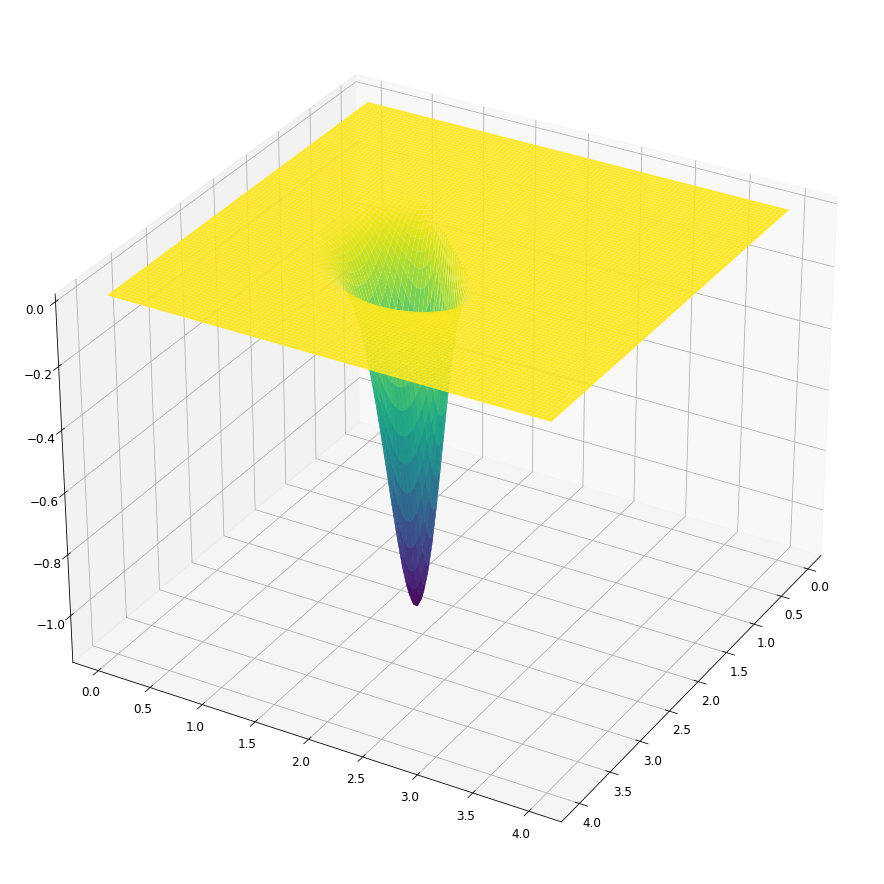

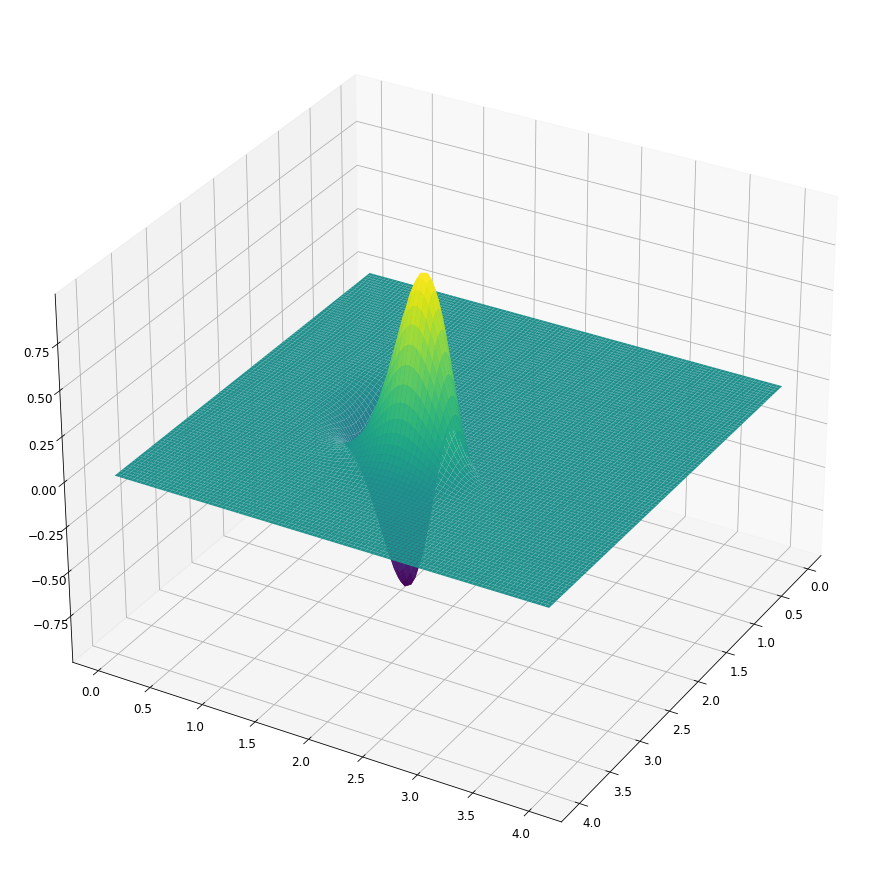

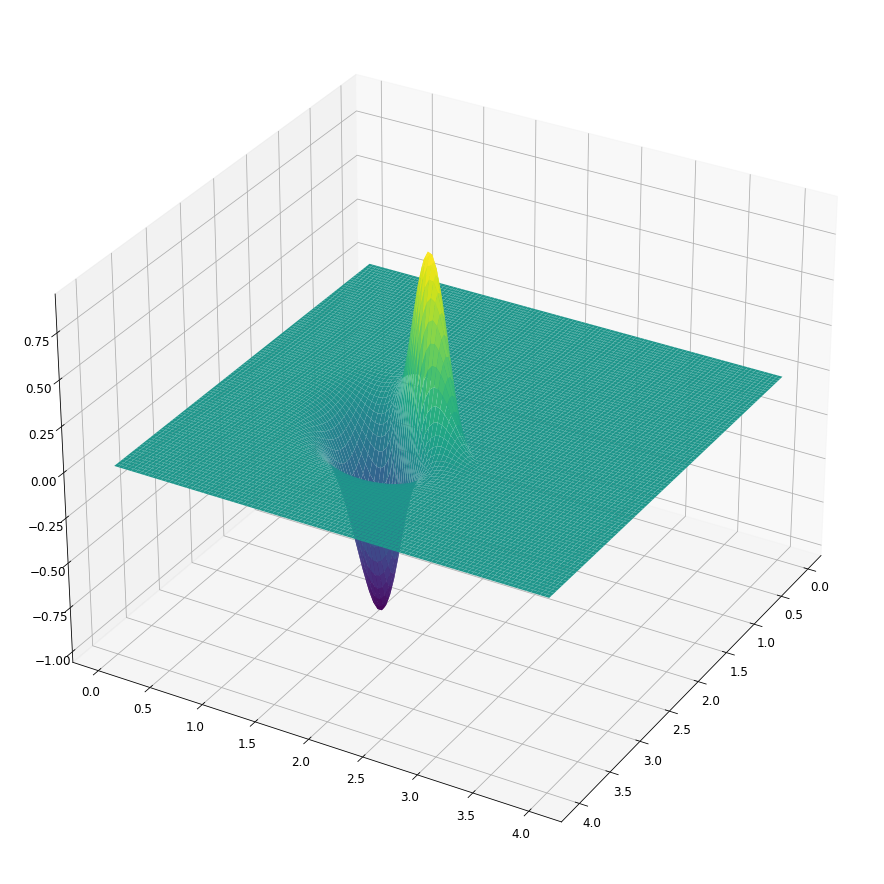

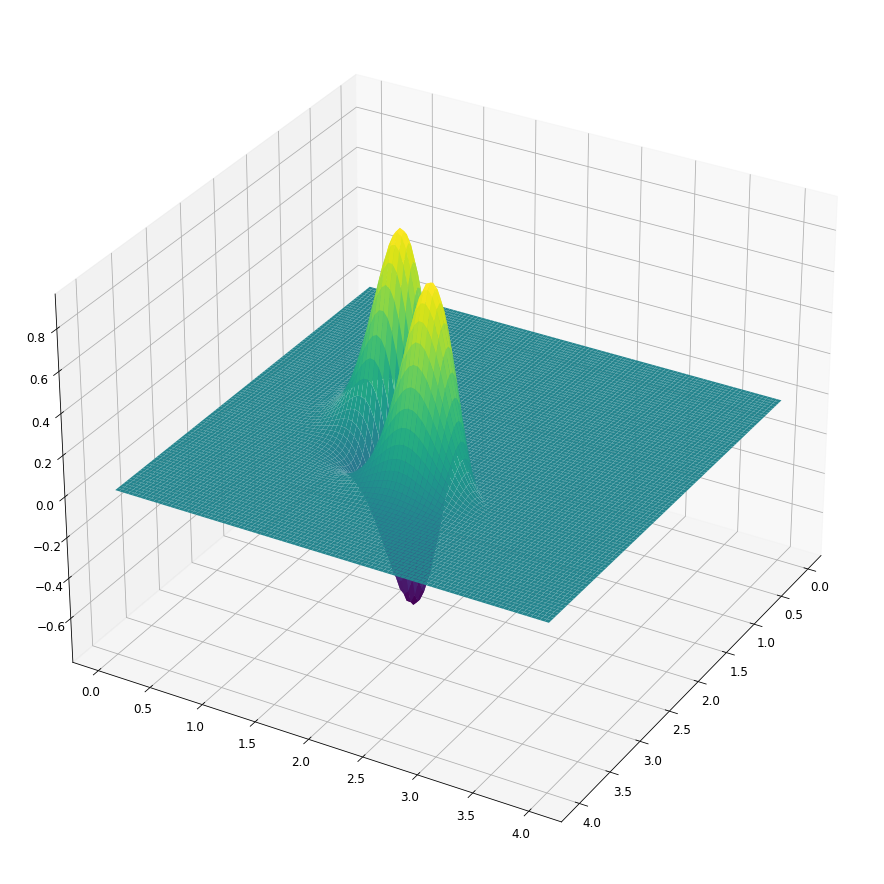

In [1814]:
fig_2 = []
ax_2 = []

for i in range(4):
    # init plots
    fig_2.append(plot.figure())
    ax_2.append(plot.axes(projection='3d'))

    # set size of plot
    fig_2[i].set_size_inches(16, 16)

    # draw plot
    ax_2[i].plot_surface(X, Y, display_vectors[i], rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax_2[i].view_init(30, 30)

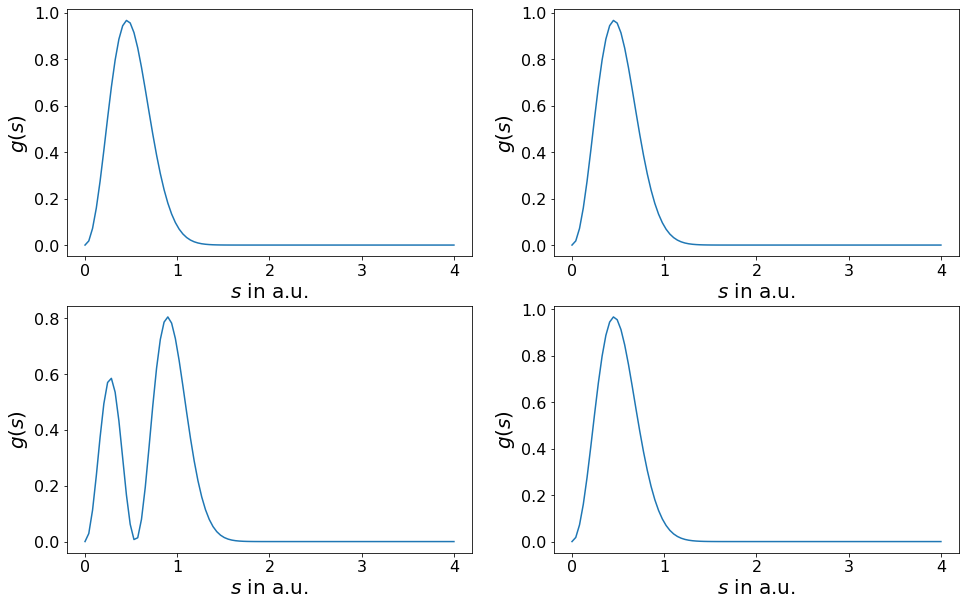

In [1815]:
correlation_functions = []

# calculate pair correlation function
for k in range(6):
    for i in range(number_of_data_points):
        correlation_functions.append(np.zeros(number_of_data_points))

        for j in range(number_of_data_points):
            if (j + i) < number_of_data_points:
                correlation_functions[k][i] += eigen_vectors[k][j, j + i] * eigen_vectors[k][j, j + i] * step_size
            if (j - i) >= 0:
                correlation_functions[k][i] += eigen_vectors[k][j, j - i] * eigen_vectors[k][j, j - i] * step_size
                
# generate data for x axis / plot area
x = np.linspace(0, 4, number_of_data_points)
    
# init plots
fig, _ax = plot.subplots(nrows=2, ncols=2)
ax = _ax.flatten()

# set size of plot
fig.set_size_inches(16, 10)

for i in range(4):
    # draw plot
    ax[i].plot(x, correlation_functions[i])
    
    # set axis labels
    ax[i].set_xlabel('$s$ in a.u.', fontsize=20)
    ax[i].set_ylabel('$g(s)$', fontsize=20)
    ax[i].tick_params(axis='both', which='major', labelsize=16)

plot.show()